In [2]:
# Imports

import sys
import networkx as nx
sys.path.append('../')

# import inputreader from parent utils dir
from utils.inputreader import read_input_matrix, read_input

In [3]:
# Matrix Input
sample_input = read_input_matrix('sample.txt')
#full_input = read_input_matrix('input.txt')


In [4]:
sample_input

[['.', '.', '.', '.', '.'],
 ['.', 'S', '-', '7', '.'],
 ['.', '|', '.', '|', '.'],
 ['.', 'L', '-', 'J', '.'],
 ['.', '.', '.', '.', '.']]

In [5]:
# Line Input
#sample_input = read_input('sample.txt')
#full_input = read_input('input.txt')



In [6]:
def build_graph(input):
    G = nx.DiGraph()
    source_node = None
    for i, row in enumerate(input):
        for j, col in enumerate(row):
            if col == '.':
                continue
            if col == 'S':
                source_node = (i,j)
            G.add_node((i,j))
            if col == '|':
                if i - 1 >= 0:
                    G.add_edge((i,j), ((i-1,j)))
                if i + 1 < len(input):
                    G.add_edge((i,j), ((i+1,j)))
            if col == '-':
                if j - 1 >= 0:
                    G.add_edge((i,j), ((i,j-1)))
                if j + 1 < len(row):
                    G.add_edge((i,j), ((i,j+1)))
            if col == 'L':
                if i - 1 >= 0:
                    G.add_edge((i,j), ((i-1,j)))
                if j + 1 < len(row):
                    G.add_edge((i,j), ((i,j+1)))
            if col == 'J':
                if i - 1 >= 0:
                    G.add_edge((i,j), ((i-1,j)))
                if j - 1 >= 0:
                    G.add_edge((i,j), ((i,j-1)))
            if col == '7':
                if i + 1 < len(input):
                    G.add_edge((i,j), ((i+1,j)))
                if j - 1 >= 0:
                    G.add_edge((i,j), ((i,j-1)))
            if col == 'F':
                if i + 1 < len(input):
                    G.add_edge((i,j), ((i+1,j)))
                if j + 1 < len(row):
                    G.add_edge((i,j), ((i,j+1)))
        
    return G, source_node

In [7]:
g, source_node = build_graph(sample_input)


In [8]:
g.nodes()

NodeView(((1, 1), (1, 2), (1, 3), (2, 3), (2, 1), (3, 1), (3, 3), (3, 2)))

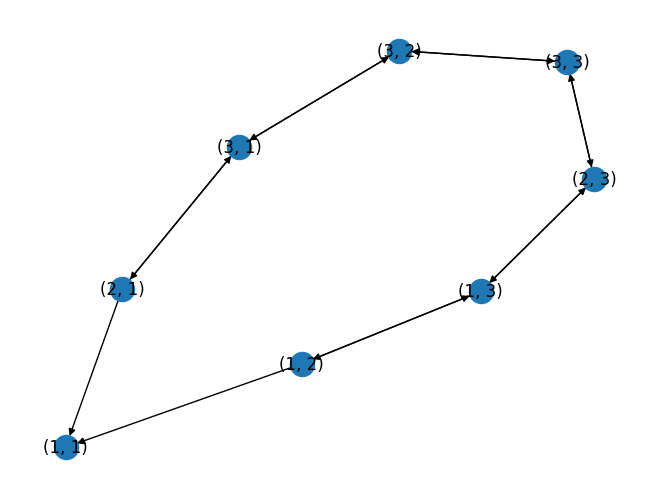

In [9]:
nx.draw(g, with_labels=True)

In [13]:
tree = nx.breadth_first_search.bfs_tree(g, source_node)

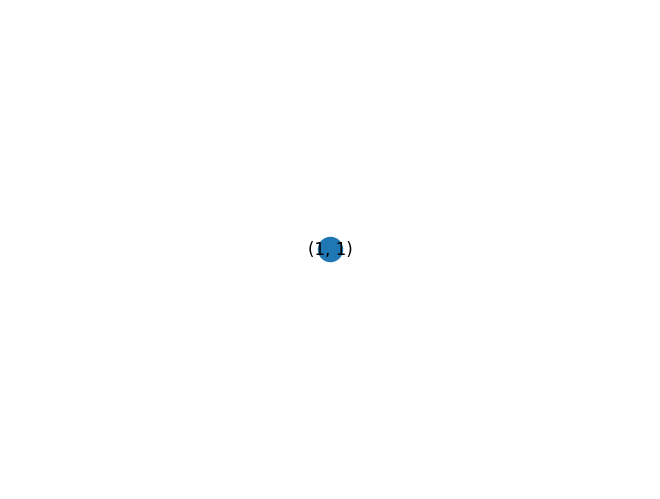